# Guided Project: Finding the Best Markets to Advertise In
Let's imagine that we're data analysist in e-learning company that offers courses on programming. Most of them are on web and mobile development, but we also cover many other domains, like data science, game development, etc. Our company want to promote our product and we'd like to invest some more money in advertisement. Our goal is
> finding out the two best markets to advertise our product in.

To reach our goal, we could organize surveys for a couple of different markets to find out which would be the best choise for advertising. However, this is very costly, and it's good call to explore cheaper options first. 
<br>
<br>
We can try to search existing data that might be relevant for our purpose. One good candidate is the data from [freeCodeCamp's 2017 New Coder Survey](https://www.freecodecamp.org/news/we-asked-20-000-people-who-they-are-and-how-theyre-learning-to-code-fff5d668969/). Due to a popular [Medium publication](https://www.freecodecamp.org/news/), their survey attracted new coders with varying interests, which is ideal for our purpose. [Data source](https://github.com/freeCodeCamp/2017-new-coder-survey).
## Overview


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
import numpy as np
import seaborn as sns

In [2]:
#reading data set
survey = pd.read_csv('2017-fCC-New-Coders-Survey-Data.csv', low_memory=False)

In [3]:
survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18175 entries, 0 to 18174
Columns: 136 entries, Age to YouTubeTheNewBoston
dtypes: float64(105), object(31)
memory usage: 18.9+ MB


In [4]:
survey.sample(10)

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,...,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston
10372,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,1.0,1.0,NaN,1.0,NaN,NaN,NaN,NaN
8700,NaN,0.0,NaN,NaN,NaN,NaN,NaN,"less than 100,000",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8786,24.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,the new boston,NaN,NaN
6639,23.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,1.0,NaN,1.0,NaN,1.0,NaN,NaN,1.0
10388,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,cs50,NaN,NaN
11482,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14089,22.0,0.0,NaN,NaN,NaN,NaN,NaN,"less than 100,000",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
12631,27.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
14623,25.0,0.0,NaN,NaN,NaN,NaN,NaN,"less than 100,000",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15521,28.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,1.0,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
survey.JobRoleInterest.value_counts(normalize=True) * 100

Full-Stack Web Developer                                                                                                                                                                                11.770595
  Front-End Web Developer                                                                                                                                                                                6.435927
  Data Scientist                                                                                                                                                                                         2.173913
Back-End Web Developer                                                                                                                                                                                   2.030892
  Mobile Developer                                                                                                                                              

As we see above, this column can help us to determine field of interests for every respondent. Let's find which domain is the most demand.
## Most popular roles
There are some issues with nan values and the format of this column (all values are string), so we will fill NaN values with 'Not Specified' and make column's type as a list for every row.

In [6]:
#fill nan values 
survey.JobRoleInterest.fillna('Not Specified', inplace = True)
# reformating Job Role Interest in appropriate view
survey.JobRoleInterest = survey.JobRoleInterest.str.replace(' ', '').str.split(',')

In [7]:
# Double-check
survey.JobRoleInterest.isna().sum()

0

In [8]:
#Creating frequency table
inter_fq = {}
def fq(col):
    for i in col:
        if i in inter_fq:
            inter_fq[i] += 1
        else:
            inter_fq[i] = 1
survey.JobRoleInterest.apply(fq)
domains = pd.Series(inter_fq)

So, what are the 10 most popular domains in programming ?

In [9]:
top10_domains = domains.sort_values(ascending = False).head(10)

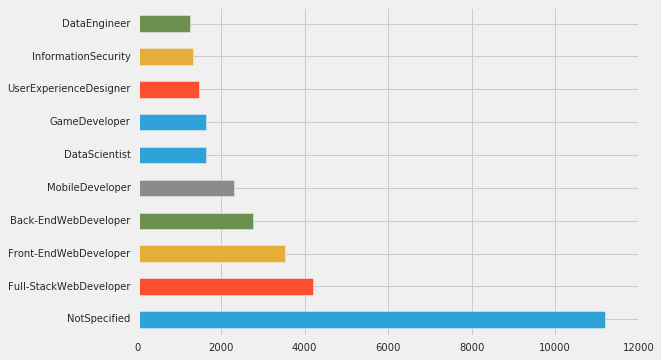

In [10]:
plt.style.use('fivethirtyeight')
top10_domains.plot.barh()
plt.show()

As we observe the horizontal chart above, most of users did not specified their fields of interests. However, web development is clearly the most popular topic on programming. What does pie chart can show us?

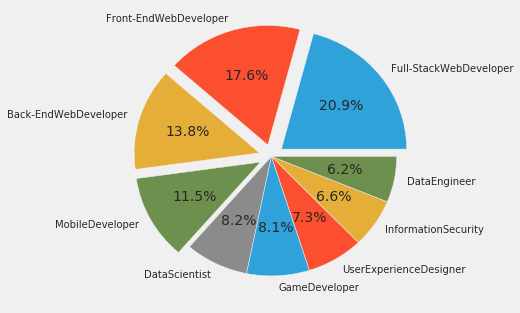

In [11]:
#remove unspecified domains
spec_10 = top10_domains.tail(9)
explode = (0.1, 0.1, 0.1, 0.1, 0, 0, 0, 0, 0)
spec_10.plot.pie(explode = explode, figsize = (5,5), autopct='%.1f%%')
plt.ylabel('')
plt.show()

Looking at the pie chart above, we can say following:
- More than half of determined users are interested in Web-development.
- Due to our company's most domains, Mobile-Development and Web-Development are indeed the most popular topics in programming.

For now I have one more quesiton to popular topics in programming: Are people interested in only one subject or they can be interested in more than one subject?

In [12]:
#survey['NJobRoleInterest'] = survey.JobRoleInterest.apply(len)
spec_mask = ~survey['JobRoleInterest'].astype(str).str.contains('NotSpecified')
determ_topic = survey[spec_mask]['JobRoleInterest'].apply(len)

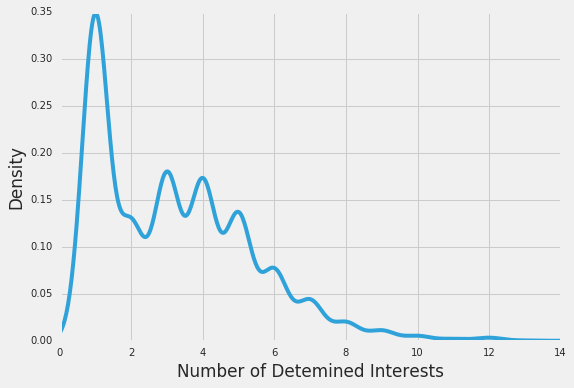

In [13]:
determ_topic.plot.kde()
plt.xlabel('Number of Detemined Interests')
plt.xlim(0, 14)
plt.show()

As we see above, the majority of users are interested in 1-4 topics.

## Target countries
Now we need to figure out which counries we would like to advertise in.

In [14]:
# Leaving out users with unspecified role which they are interested in.
survey_new = survey[spec_mask].copy()

In [15]:
# Absolute values
survey_new['CountryLive'].value_counts().head(10)

United States of America    3125
India                        528
United Kingdom               315
Canada                       260
Poland                       131
Brazil                       129
Germany                      125
Australia                    112
Russia                       102
Ukraine                       89
Name: CountryLive, dtype: int64

In [16]:
survey_new['CountryLive'].value_counts(normalize = True).head(10) * 100

United States of America    45.700497
India                        7.721556
United Kingdom               4.606610
Canada                       3.802281
Poland                       1.915765
Brazil                       1.886517
Germany                      1.828020
Australia                    1.637906
Russia                       1.491664
Ukraine                      1.301550
Name: CountryLive, dtype: float64

About a half of users are living in the USA. This market indisputably should be choosen for advertisement. On the other hand, it's hard to determine the second country as target (as we need two of them). We can continue by figuring out how much money new coders are actually willing to spend on learning. Advertising within markets where most people are only willing to learn for free is extremely unlikely to be profitable for us. 

The `MoneyForLearning` column describes in American dollars the amount of money spent by participants from the moment they started coding until the moment they completed the survey. Our company sells subscriptions at a price of $59 per month, and for this reason we're interested in finding out how much money each student spends per month.

It also seems like a good idea to narrow down our analysis to only four countries: the US, India, the United Kingdom, and Canada (as our courses are written in English and these countries show high frequencies). 

In [17]:
# Creating a new column that describes the amount of money a student 
# has spent per month for learning

survey_new['MFL_per_month'] = survey_new['MoneyForLearning']/survey_new['MonthsProgramming']

In [18]:
#check null values
print(survey_new['MFL_per_month'].isna().sum())
print(survey_new['CountryLive'].isna().sum())

863
154


In [19]:
#drop null values for following columns
survey_new = survey_new.dropna(subset = ['MFL_per_month', 'CountryLive'])

In [20]:
#double-check
print(survey_new['MFL_per_month'].isna().sum())
print(survey_new['CountryLive'].isna().sum())

0
0


In [33]:
# A list of countries which we are interested in
int_countries = ['United States of America', 'India', 'United Kingdom', 'Canada']

In [34]:
# Target respondets only from these countries
targ_resp = survey_new[survey_new['CountryLive'].isin(int_countries)]

In [23]:
# Try to find the mean value for every country
targ_resp.groupby('CountryLive').mean()['MFL_per_month']

CountryLive
Canada                      inf
India                       inf
United Kingdom              inf
United States of America    inf
Name: MFL_per_month, dtype: float64

It happens due to some infinite values in rows. Let's clean them.

In [24]:
targ_resp = targ_resp[targ_resp['MFL_per_month'] != np.inf]

In [25]:
targ_resp.groupby('CountryLive').mean()['MFL_per_month'].sort_values(ascending = False)

CountryLive
United States of America    232.771574
India                       136.347477
Canada                      107.415450
United Kingdom               46.904110
Name: MFL_per_month, dtype: float64

Much better! As we see, the UK is off target - users have spent much less money for e-learning there. On the other hand, if we consider some socio-economical metrics (like GDP per capita), Canada and the UK should be much much higher than India. 

It can be caused by not enough representative data for the above countries. Or it might be that the results are correct. Move on in depth: we will display them with box plots.

/dataquest/system/env/python3/lib/python3.4/site-packages/seaborn/categorical.py:454: FutureWarning:

remove_na is deprecated and is a private function. Do not use.



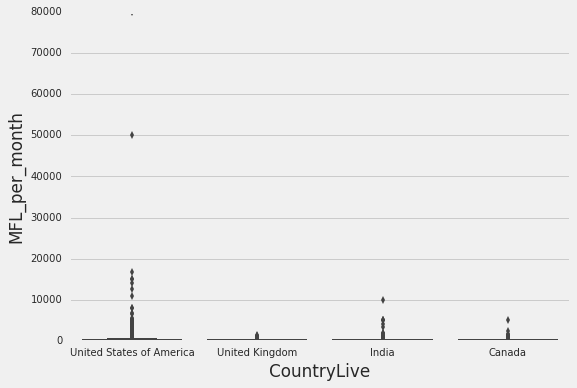

In [26]:
sns.boxplot(x = 'CountryLive', y = 'MFL_per_month', data = targ_resp)

As it seems to me, box plots are not representative in this case. Let's try to use strip plots.

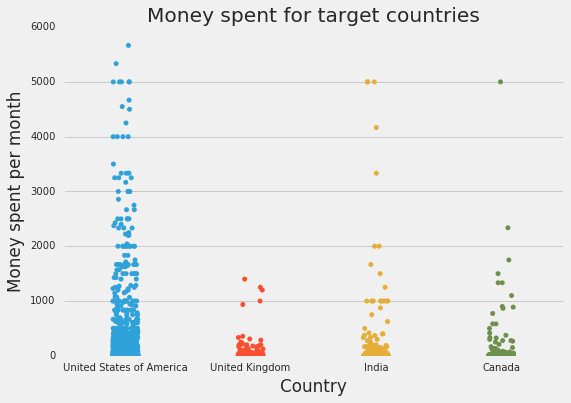

In [27]:
#Stripplot
sns.stripplot(x = 'CountryLive', y = 'MFL_per_month', data = targ_resp, jitter = True)
plt.xlabel('Country')
plt.ylabel('Money spent per month')
plt.title('Money spent for target countries')
plt.ylim(0, 6000)
plt.show()

Here we go! As we see, there are a lot of outliers for the USA, India and Canada (the UK plot is flattened). We can eliminate outliers from samples and recompute the mean values. The step below is better to describe:

1. We compute the upper edge for outliers
2. We create a Series object of pd.Interval which not include zero(we are not interested in free-learning users)

In [28]:
# We can eliminate values which are zeroes (our company is interested in selling)
# and which are above 75th percentile(or 3rd quantile) + 1.5 standart deviation 
upper_edge = targ_resp.groupby('CountryLive')['MFL_per_month'].quantile(.75) + targ_resp.groupby('CountryLive')['MFL_per_month'].std(ddof = 1)* 1.5
group = upper_edge.apply(lambda x: pd.Interval(0, x, closed = 'right'))
group

CountryLive
Canada                       (0, 666.9983234311932]
India                       (0, 1061.9943631822334]
United Kingdom              (0, 268.05093983931357]
United States of America    (0, 3011.3906203011447]
Name: MFL_per_month, dtype: object

Next we retain only rows if the value of spent money per month is in interval according to its country interval (described above)

In [29]:
# Create a function which return True value if it is NOT an outlier according to already mentioned Series object.
no_out_mask = targ_resp.apply(lambda x: x['MFL_per_month'] in group[x['CountryLive']], axis = 1)
norm_targ_resp = targ_resp[no_out_mask]
# Recompute the mean values
norm_targ_resp.groupby('CountryLive')['MFL_per_month'].mean().sort_values(ascending = False)

CountryLive
United States of America    200.726306
India                       112.219722
Canada                       73.142299
United Kingdom               44.043125
Name: MFL_per_month, dtype: float64

/dataquest/system/env/python3/lib/python3.4/site-packages/seaborn/categorical.py:454: FutureWarning:

remove_na is deprecated and is a private function. Do not use.



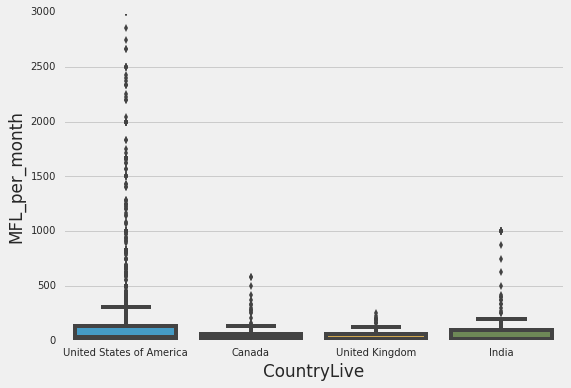

In [30]:
sns.boxplot(x = 'CountryLive', y = 'MFL_per_month', data = norm_targ_resp)
plt.show()

This box-and-whisker plot is more representative than before.

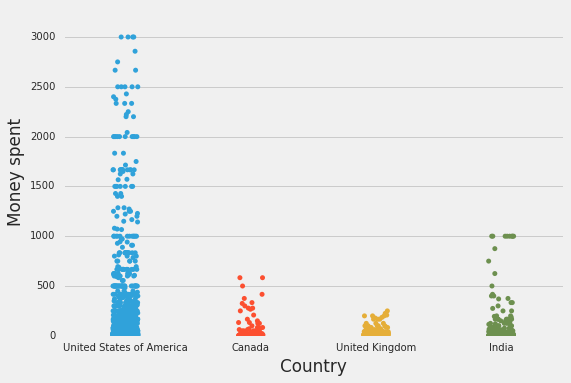

In [31]:
sns.stripplot(x = 'CountryLive', y = 'MFL_per_month', data = norm_targ_resp, jitter = True)
plt.ylim(0, 3300)
plt.xlabel('Country')
plt.ylabel('Money spent')
plt.show()

Combine all information essence.

In [32]:
final = pd.concat([norm_targ_resp['CountryLive'].value_counts(), norm_targ_resp.groupby('CountryLive')['MFL_per_month'].mean()], axis = 1)
final.columns = ['Amount of users', 'Avg Money spent']
final.sort_values('Amount of users')

,Amount of users,Avg Money spent
Canada,102,73.142299
United Kingdom,127,44.043125
India,187,112.219722
United States of America,1567,200.726306


At this point, we should remind ourselves that the price of our subscription($59 per month), and it becomes clear that best two countries to advertise our e-learning course are:
- **USA**
- **India**

However, we got one more question - does it make sense to advertise in more then two countries?

> Yes, Canada is a good third candidate to advertise in.

But the final solution will be made by our company's marketing team so they can use their domain knowledge to take the best decision.